<img src='images/Question_03.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import matplotlib.image as mpimg
import numpy.linalg as la
import os
import sys
import math
from pathlib import Path

In [2]:
# It's a function for the reading the audio file.

def readWavFile(filename):
    audio  = wave.open(filename,'r')
    sample_frequecny=audio.getframerate()
    total_samples=audio.getnframes()
    
    signal = audio.readframes(-1)
    signal = np.frombuffer(signal,'int16')
    signal = np.asarray(signal,dtype='double')
    audio_time=total_samples/sample_frequecny
    #print('sample frequency:',sample_frequecny)
    #print('total samples',total_samples)
    #print('total time of the audio:'+str(audio_time)+" seconds")
    audio.close()
    return signal, sample_frequecny,total_samples

# it's function for the plotting the audio.
def plotAudio(data,title='title'):
    fig, ax = plt.subplots()
    #ax.plot(t, s)
    ax.plot(data)
    ax.set(xlabel='samples', ylabel='Signal', title=title)
    ax.grid()
    fig.savefig(title+".png")
    plt.show()


# it is giving the window of the audio file.
def get_window(audio,window_size,hop_index,hop_length):
    lower=hop_index*hop_length
    upper=lower+window_size
    return audio[lower:upper]
 
# converting the sample_window to vector 
def convert_sample_window_to_vector(window_sample):
    output=np.fft.fft(window_sample,64)
    return np.log(np.abs(output[0:32]))


def get_spectrogram_vector(audio_file_path,window_type,window_size,hop_length):

    audio1, sample_frequency, total_samples = readWavFile(audio_file_path)
    total_hops=math.floor((total_samples-window_size)/hop_length+1)
    window=np.ones(window_size)
    if(window_type=='hamming'):
        window=np.hamming(window_size)
        #print('\n using hamming window')

    total_hops=math.floor((total_samples-window_size)/hop_length+1)
    spectrogram_vector=[]
    for hop_index in range(total_hops):
        sample_window=get_window(audio1, window_size, hop_index, hop_length)
        sample_window=np.multiply(sample_window,window)
        feature_vector=convert_sample_window_to_vector(sample_window)
        spectrogram_vector.append(feature_vector)
    spectrogram_vector=np.array(spectrogram_vector)
    
    
    return spectrogram_vector    
  
def whitening(X):
    X_mean=np.mean(X,axis=0)
    X_centred=X-X_mean
    #print(np.mean(X_centred))
    L,U=np.linalg.eigh((1/N)*(X_centred.T@X_centred))
    idx = np.argsort(-L)
    L = L[idx]
    U = U[:,idx]
    L_sqrt=np.diag(np.sqrt(1/L))
    transformed_data=X_centred@U
    Y=transformed_data@L_sqrt
    return Y,L,U    

def plot_audio_spectrogram(audio_feature_vector,title):
    N=audio_feature_vector.shape[0]
    fig=plt.figure(figsize=(20,20))
    plt.imshow(clean_audio_feature_vector.T)
    plt.title(title)
    plt.xlabel('Hop index')
    plt.ylabel('Frequencies')

In [3]:
window_type='hamming'
window_size=400
hop_length=160
hop_index=10


music_path='speechMusicData/speech_music_classification/train/music/'
speech_path='speechMusicData/speech_music_classification/train/speech/'

# Loading the training data:

In [4]:
import os

music_data=[]
music_labels=[]
speech_data=[]
speech_labels=[]
music_files_list=os.listdir(music_path)

for i in music_files_list:
    individual_file_path=music_path+i
    print(individual_file_path)
    audio_spectorgram_vector=get_spectrogram_vector(individual_file_path,window_type,window_size,hop_length)
    music_data.append(audio_spectorgram_vector)
    music_labels.append(np.ones(shape=(2998,1)))
speech_files_list=os.listdir(speech_path)

for i in speech_files_list:
    individual_file_path=speech_path+i
    print(individual_file_path)
    audio_spectorgram_vector=get_spectrogram_vector(individual_file_path,window_type,window_size,hop_length)
    speech_data.append(audio_spectorgram_vector)
    speech_labels.append(np.zeros(shape=(2998,1)))

speechMusicData/speech_music_classification/train/music/blues.wav
speechMusicData/speech_music_classification/train/music/glass1.wav
speechMusicData/speech_music_classification/train/music/hendrix.wav
speechMusicData/speech_music_classification/train/music/brahms.wav
speechMusicData/speech_music_classification/train/music/bmarsalis.wav
speechMusicData/speech_music_classification/train/music/loreena.wav
speechMusicData/speech_music_classification/train/music/cure.wav
speechMusicData/speech_music_classification/train/music/georose.wav
speechMusicData/speech_music_classification/train/music/guitar.wav
speechMusicData/speech_music_classification/train/music/ballad.wav
speechMusicData/speech_music_classification/train/music/caravan.wav
speechMusicData/speech_music_classification/train/music/copland.wav
speechMusicData/speech_music_classification/train/music/duke.wav
speechMusicData/speech_music_classification/train/music/bartok.wav
speechMusicData/speech_music_classification/train/music/gis

In the following code, we loaded the training and testing data separately 

In [5]:
# X: vector representation of the music.
# X_labels:     true labels of the features.
    
music_X=np.vstack(music_data)
music_X_labels=np.vstack(music_labels)
    
speech_X=np.vstack(speech_data)
speech_X_labels=np.vstack(speech_labels)

In [6]:
from sklearn.cluster import KMeans

def init_parameters_for_GMM(X,no_components):
    
    # we got the means initialization from the k-means......
    kmeans = KMeans(n_clusters=no_components, random_state=0).fit(X)
    labels=kmeans.labels_
    inital_means=kmeans.cluster_centers_
    
    #initalizing the cov matrices
    gmm_cov_matrix=[]
    for index in range(no_components):
        points_i=X[np.where(labels==index)]
        no_points_i=points_i.shape[0]
        centred_data=points_i-inital_means[index,:]
        
        cov_matrix_i=np.zeros(shape=(32,32),dtype='float64')
        
        
        for i in centred_data:
            temp=np.outer(i,i)
            cov_matrix_i=cov_matrix_i+temp
        
        cov_matrix_i=(1/no_points_i)*cov_matrix_i
        gmm_cov_matrix.append(cov_matrix_i)
    gmm_cov_matrix=np.array(gmm_cov_matrix)
    
    #init the probabilites
    theta=1/no_components*np.ones(shape=(no_components,1))    
    
    
    
    return labels,inital_means,gmm_cov_matrix,theta

# Probability Distribution Function of the multi-variable normal distrubution. 
def multivariate_normal(X, mean_vector, covariance_matrix):
    D=X.shape[0]
    exponent=0.5*(X-mean_vector).T@np.linalg.inv(covariance_matrix)@(X-mean_vector)
    denominator=((2*np.pi)**D)*np.linalg.det(covariance_matrix)
    denominator=np.sqrt(denominator)
    value=np.exp(-exponent)/denominator
    return value

# we are using this function for random  sampling the data.
# we used this for loading some part of data for training the model.

def random_sampling(X,X_labels,total_no_samples):
    list_indices=list(range(total_no_samples))
    np.random.shuffle(list_indices)	
    return X[list_indices],X_labels[list_indices]


In [7]:
# we are using the following function for calculating the log-likelihood sum.
def get_log_likelihood(X,gmm_means,gmm_cov_matrix,theta):
    log_likelihood=0
    total_no_points=X.shape[0]
    no_components=gmm_means.shape[0]
    
    #print('total_no_points',total_no_points,'no_components',no_components)
    for i in range(total_no_points):
        mixed_guassian_sum=0
        for cluster_yi in range(no_components):
            likelihood=multivariate_normal(X[i],gmm_means[cluster_yi],gmm_cov_matrix[cluster_yi])
            mixed_guassian_sum=mixed_guassian_sum+likelihood*theta[cluster_yi]
        log_likelihood=log_likelihood+np.log(mixed_guassian_sum)
    return log_likelihood

In [8]:
# It returns the updated covariance matrix.
# cov_matrix_type=='DIAG': it reurns the diagonal covariance matirx.
# cov_matrix_type=='FULL': it reurns the FULL covariance matirx.
# cov_matrix_type=='IDENTITY': it reurns the identity matrix as covariance matirx.


def get_updated_cov_matrix(X,r,means_updated,cov_matrix_type):
    #print("updating the cov matrix")
    total_no_points=X.shape[0]
    D=X.shape[1]
    no_components=r.shape[1]
    
    # updating the covariance matrices..................
    gmm_cov_matrix_updated=np.zeros(shape=(no_components,D,D))
    
    if(cov_matrix_type=='FULL'):
        for cluster_yi in range(no_components):
            temp_cov_matix=np.zeros(shape=(32,32))
            for i in range(total_no_points):
                x_i=X[i]
                temp_cov_matix=temp_cov_matix+r[i,cluster_yi]*np.outer(x_i-means_updated[cluster_yi],x_i-means_updated[cluster_yi])
            temp_cov_matix=temp_cov_matix/np.sum(r[:,cluster_yi])
            gmm_cov_matrix_updated[cluster_yi]=temp_cov_matix    
    elif(cov_matrix_type=='DIAG'):
        for cluster_yi in range(no_components):
            temp_cov_matix=np.zeros(shape=(32,32))
            for i in range(total_no_points):
                x_i=X[i]
                temp_cov_matix=temp_cov_matix+r[i,cluster_yi]*np.outer(x_i-means_updated[cluster_yi],x_i-means_updated[cluster_yi])
            temp_cov_matix=np.diag(np.diag(temp_cov_matix))
            temp_cov_matix=temp_cov_matix/np.sum(r[:,cluster_yi])
            gmm_cov_matrix_updated[cluster_yi]=temp_cov_matix 
    elif(cov_matrix_type=='IDENTITY'):
        for cluster_yi in range(no_components):
            gmm_cov_matrix_updated[cluster_yi]=np.eye(D) 
        
    return gmm_cov_matrix_updated

In [9]:
# It returns the parameters for fitting the given data.
# It fits the data using multi-variable normal distribution.

def Expectation_Maximization_Updated(X,no_components,no_iterations,cov_matrix_type):
    
    # we are initilizing the parameters using K-means
    labels,inital_means,gmm_cov_matrix,theta=init_parameters_for_GMM(X,no_components)
    
    #print('get_log_likelihood',get_log_likelihood(X,inital_means,gmm_cov_matrix,theta))
    
    log_likelihood=[]
    
    for iteration in range(no_iterations):
        total_no_points=X.shape[0]
        D=X.shape[1]
        
        # storing the posterior-probabilities...
        r=np.zeros(shape=(total_no_points,no_components),dtype='float64')
        
        cluster_yi=1
        for i in range(total_no_points):
            dec_sum=0
            for cluster_yi in range(no_components):
                temp=multivariate_normal(X[i],inital_means[cluster_yi],gmm_cov_matrix[cluster_yi])
                r[i][cluster_yi]=temp*theta[cluster_yi]
                dec_sum=dec_sum+r[i][cluster_yi]
            r[i,:]=r[i,:]/dec_sum
        #print('Posterior calculation completed-------')
        
        # M-step updating the mean and Covariance-matirces....................
        
        # updating the probabilities.........................
        
        theta_updated=np.zeros_like(theta)
        
        theta_updated=(1/total_no_points)*np.sum(r,axis=0)
        
        #updating the means........................
        means_updated=np.zeros_like(inital_means)
        
        for cluster_yi in range(no_components):
            #print("X:shape",X.shape)
            #print("r shape",r[:,index].shape)
            means_updated[cluster_yi]=X.T@r[:,cluster_yi]/np.sum(r[:,cluster_yi])
            #print("Mean:"+str(i),means_updated[index])    
            
            
        # updating the covariance matrices..................
        gmm_cov_matrix_updated=get_updated_cov_matrix(X,r,means_updated,cov_matrix_type)
                       
        inital_means=means_updated
        gmm_cov_matrix=gmm_cov_matrix_updated
        theta=theta_updated
        
        print("iteration: "+str(iteration)+" completed.")
        log_likelihood_value=get_log_likelihood(X,inital_means,gmm_cov_matrix,theta)
        print('get_log_likelihood',log_likelihood_value)
        log_likelihood.append(log_likelihood_value)
    log_likelihood=np.array(log_likelihood)
    return inital_means,gmm_cov_matrix,theta,log_likelihood


In [10]:
# It returns the multi-variable normal distribution parameters for the speech and music.
# It is using the Expectation-Maximization Algorithm for modeling the music and speech.

def GMM_Music_Speech_Model(music_data,speech_data,no_components,no_iterations,cov_matrix_type):
    music_X,music_X_labels=music_data
    speech_X,speech_X_labels=speech_data
    
    gmm_music_parameters=Expectation_Maximization_Updated(music_X,no_components,no_iterations,cov_matrix_type)
    gmm_speech_parameters=Expectation_Maximization_Updated(speech_X,no_components,no_iterations,cov_matrix_type)
    
    return gmm_music_parameters,gmm_speech_parameters

In [52]:
# it is plotting log-likelihood sum of the EM-Algorithm.
# it visualizes the algorithm progress.

def plot_log_likelihood_sum(music_log_likelihood_sum,speech_log_likelihood_sum):
    fig=plt.figure(figsize=(10,5))

    plot=fig.add_subplot(1,2,1)
    plt.plot(music_log_likelihood_sum,'r')
    plot.set_title('loglikelihood_music')
    
    plot=fig.add_subplot(1,2,2)
    plot.set_title('loglikelihood_speech')
    plt.plot(speech_log_likelihood_sum,'g')

In [26]:
# it loads the test data as spectrogram_vector of audio file and it's label.

def load_test_data(test_data_path):
    test_data=[]
    test_labels=[]
    test_files_list=os.listdir(test_data_path)
    for i in test_files_list:
        individual_file_path=test_data_path+i
        file_type=Path(individual_file_path).parts[-1].split('_')[0]
        audio_spectorgram_vector=get_spectrogram_vector(individual_file_path,window_type,window_size,hop_length)
        test_data.append(audio_spectorgram_vector)
        no_window_samples=audio_spectorgram_vector.shape[0]
        if(file_type=='music'):
            test_labels.append(1)
        elif(file_type=='speech'):
            test_labels.append(0)
            
    test_data=np.array(test_data)
    test_labels=np.array(test_labels)
    return test_data,test_labels

In [27]:
# it returns the likelihood of the X.

def get_likelihood(test_X,gmm_parameters):
    gmm_means_01,gmm_cov_matrix_01,theta_01,log_likelihood_01=gmm_parameters
    total_samples=test_X.shape[0]
    no_components=theta_01.shape[0]
    
    
    likelihood_table=np.zeros(shape=(total_samples,no_components))

    #print(total_samples,no_components)
 
    for i in range(total_samples):
        for cluster_yi in range(no_components):
            x_i=test_X[i]
            likelihood_table[i][cluster_yi]=multivariate_normal(x_i,gmm_means_01[cluster_yi],gmm_cov_matrix_01[cluster_yi])
            
    likelihood_table=likelihood_table@theta_01
    #print(likelihood_table.shape)
    return likelihood_table.reshape(-1,1)

Since, the data is very heavy we are traing on the $10000$ samples.
We are taking $10000$ random samples from trainging data.

In [28]:
# it is a function for classifing the audio file.

def music_speech_classifier(audio_feature_vector,gmm_music_parameters,gmm_speech_parameters):
 
    total_samples=audio_feature_vector.shape[0]
    music_likelihood=get_likelihood(audio_feature_vector,gmm_music_parameters)
    speech_likelihood=get_likelihood(audio_feature_vector,gmm_speech_parameters)
    
    temp=np.hstack([speech_likelihood,music_likelihood])
    
    calculated_labels=np.argmax(temp, axis=1)

    music_file_prob=np.where(calculated_labels==1)[0].shape[0]
    speech_file_prob=np.where(calculated_labels==0)[0].shape[0]
    
    if(music_file_prob>speech_file_prob):
        return 1
    else:
        return 0

In [33]:
from pathlib import Path
test_data_path='speechMusicData/speech_music_classification/test/'

# It is function for calculating testing accuracy.
def test_accuracy(test_data_path,gmm_music_parameters_01,gmm_speech_parameters_01):
    test_data,test_labels=load_test_data(test_data_path)
    total_samples=test_data.shape[0]
    correct=0
    for i in range(test_data.shape[0]):
        #print(test_data[i].shape)
        result=music_speech_classifier(test_data[i],gmm_music_parameters_01,gmm_speech_parameters_01)
        if(result==test_labels[i]):
            correct=correct+1
    return (correct/total_samples)*100

In [11]:
random_music_data=random_sampling(music_X,music_X_labels,10000)  
random_speech_data=random_sampling(speech_X,speech_X_labels,10000) 

#gmm_music_parameters_01=Expectation_Maximization_Updated(random_music_X,no_components=2,no_iterations=30,cov_matrix_type='FULL')
#gmm_speech_parameters_01=Expectation_Maximization_Updated(random_speech_X,no_components=2,no_iterations=30,cov_matrix_type='FULL')



# 2-GMM FULL-COVARIANCE MATRIX:

In [49]:
gmm_music_parameters_01,gmm_speech_parameters_01=GMM_Music_Speech_Model(random_music_data,
                                                                        random_speech_data,2,30,'FULL')


iteration: 0 completed.
get_log_likelihood -278732.17293927865
iteration: 1 completed.
get_log_likelihood -265725.9096942995
iteration: 2 completed.
get_log_likelihood -256133.93254310443
iteration: 3 completed.
get_log_likelihood -252462.64997190257
iteration: 4 completed.
get_log_likelihood -250478.23290849908
iteration: 5 completed.
get_log_likelihood -249348.20826217535
iteration: 6 completed.
get_log_likelihood -248769.44193708623
iteration: 7 completed.
get_log_likelihood -248461.26995460235
iteration: 8 completed.
get_log_likelihood -248304.13950146016
iteration: 9 completed.
get_log_likelihood -248214.6810905347
iteration: 10 completed.
get_log_likelihood -248158.78922889603
iteration: 11 completed.
get_log_likelihood -248126.92575016577
iteration: 12 completed.
get_log_likelihood -248109.214785677
iteration: 13 completed.
get_log_likelihood -248098.81927648935
iteration: 14 completed.
get_log_likelihood -248092.36410768345
iteration: 15 completed.
get_log_likelihood -248088.33

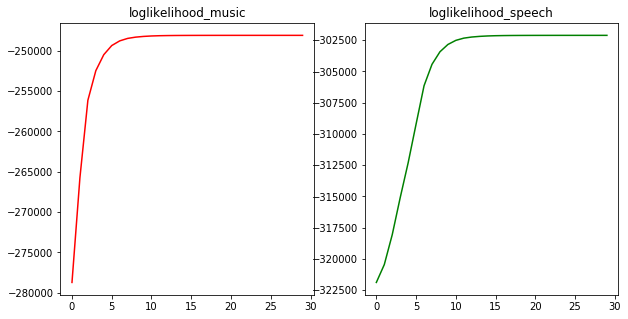

In [53]:
plot_log_likelihood_sum(gmm_music_parameters_01[3],gmm_speech_parameters_01[3])

ACCURACY TESTING

In [51]:
test_accuracy_01=test_accuracy(test_data_path,gmm_music_parameters_01,gmm_speech_parameters_01)
print('test_accuracy',test_accuracy_01)

test_accuracy 87.5


# 2-GMM DIAGONAL COVARIANCE MATRIX:

In [36]:
gmm_music_parameters_02,gmm_speech_parameters_02=GMM_Music_Speech_Model(random_music_data,
                                                                        random_speech_data,2,30,'DIAG')


iteration: 0 completed.
get_log_likelihood -394543.28009817615
iteration: 1 completed.
get_log_likelihood -391157.195646989
iteration: 2 completed.
get_log_likelihood -391122.3243252123
iteration: 3 completed.
get_log_likelihood -391115.2625771932
iteration: 4 completed.
get_log_likelihood -391112.6216839998
iteration: 5 completed.
get_log_likelihood -391111.5907472876
iteration: 6 completed.
get_log_likelihood -391111.1865351656
iteration: 7 completed.
get_log_likelihood -391111.02772524365
iteration: 8 completed.
get_log_likelihood -391110.96523753676
iteration: 9 completed.
get_log_likelihood -391110.94062440866
iteration: 10 completed.
get_log_likelihood -391110.93092278787
iteration: 11 completed.
get_log_likelihood -391110.92709699133
iteration: 12 completed.
get_log_likelihood -391110.92558786256
iteration: 13 completed.
get_log_likelihood -391110.92499245744
iteration: 14 completed.
get_log_likelihood -391110.92475751945
iteration: 15 completed.
get_log_likelihood -391110.92466

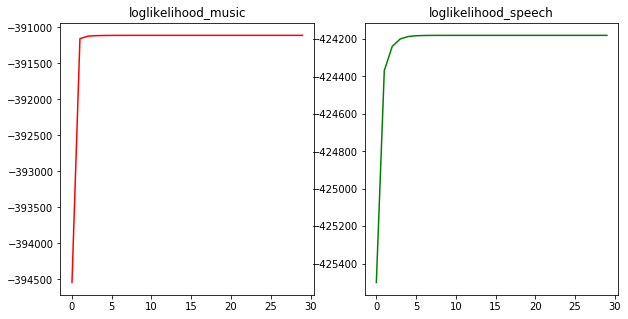

In [54]:
plot_log_likelihood_sum(gmm_music_parameters_02[3],gmm_speech_parameters_02[3])

In [38]:
test_accuracy_02=test_accuracy(test_data_path,gmm_music_parameters_02,gmm_speech_parameters_02)
print('test_accuracy',test_accuracy_02)

test_accuracy 68.75


# 5-GMM MODEL WITH FULL COVARIANCE MATRIX

In [39]:
gmm_music_parameters_03,gmm_speech_parameters_03=GMM_Music_Speech_Model(random_music_data,
                                                                        random_speech_data,5,30,'FULL')

iteration: 0 completed.
get_log_likelihood -280228.339939392
iteration: 1 completed.
get_log_likelihood -268883.1306210619
iteration: 2 completed.
get_log_likelihood -247700.9107252477
iteration: 3 completed.
get_log_likelihood -237048.9438019702
iteration: 4 completed.
get_log_likelihood -233728.76287519903
iteration: 5 completed.
get_log_likelihood -232399.26122934092
iteration: 6 completed.
get_log_likelihood -231785.4871349807
iteration: 7 completed.
get_log_likelihood -231424.10538899162
iteration: 8 completed.
get_log_likelihood -231199.89209329846
iteration: 9 completed.
get_log_likelihood -231048.36999371366
iteration: 10 completed.
get_log_likelihood -230937.3584408024
iteration: 11 completed.
get_log_likelihood -230851.51605106442
iteration: 12 completed.
get_log_likelihood -230775.422145057
iteration: 13 completed.
get_log_likelihood -230705.2987528361
iteration: 14 completed.
get_log_likelihood -230641.53720040552
iteration: 15 completed.
get_log_likelihood -230583.50800167

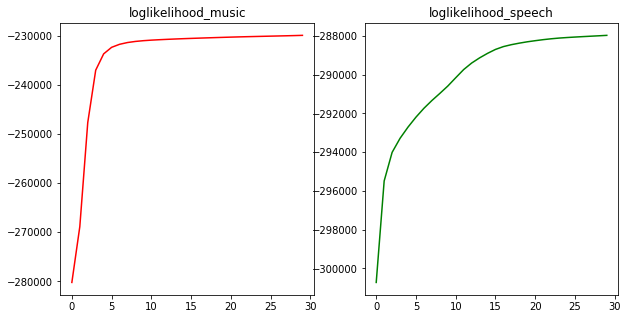

In [55]:
plot_log_likelihood_sum(gmm_music_parameters_03[3],gmm_speech_parameters_03[3])

In [41]:
test_accuracy_03=test_accuracy(test_data_path,gmm_music_parameters_03,gmm_speech_parameters_03)
print('test_accuracy',test_accuracy_03)

test_accuracy 89.58333333333334


# 5-GMM MODEL WITH DIAGONAL COVARIANCE MATRIX

In [42]:
gmm_music_parameters_04,gmm_speech_parameters_04=GMM_Music_Speech_Model(random_music_data,
                                                                        random_speech_data,5,30,'DIAG')

iteration: 0 completed.
get_log_likelihood -335855.1496583496
iteration: 1 completed.
get_log_likelihood -334325.6980620374
iteration: 2 completed.
get_log_likelihood -334001.7695476347
iteration: 3 completed.
get_log_likelihood -333637.2369822151
iteration: 4 completed.
get_log_likelihood -333060.7666442543
iteration: 5 completed.
get_log_likelihood -332234.639489045
iteration: 6 completed.
get_log_likelihood -331523.9105197213
iteration: 7 completed.
get_log_likelihood -331058.8203930257
iteration: 8 completed.
get_log_likelihood -330705.52171136416
iteration: 9 completed.
get_log_likelihood -330448.980461379
iteration: 10 completed.
get_log_likelihood -330255.3962262162
iteration: 11 completed.
get_log_likelihood -330096.269026693
iteration: 12 completed.
get_log_likelihood -329968.1432353451
iteration: 13 completed.
get_log_likelihood -329862.08838316955
iteration: 14 completed.
get_log_likelihood -329765.5329169255
iteration: 15 completed.
get_log_likelihood -329670.85403922235
it

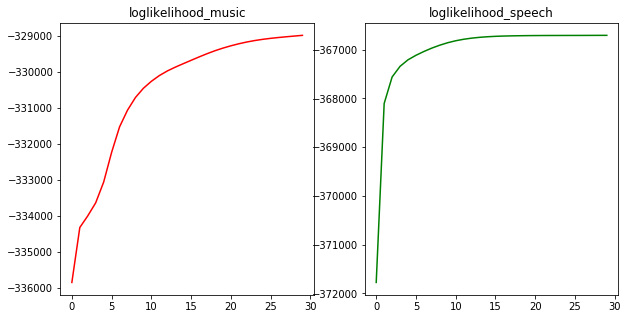

In [56]:
plot_log_likelihood_sum(gmm_music_parameters_04[3],gmm_speech_parameters_04[3])

In [48]:
test_accuracy_04=test_accuracy(test_data_path,gmm_music_parameters_04,gmm_speech_parameters_04)
print('test_accuracy',test_accuracy_04)

test_accuracy 70.83333333333334


2-GMM with FULL-Covariance matrix test_accuracy 87.5


2-GMM with Diagonal-Covariance matrix test_accuracy 68.75


5-GMM with FULL-Covariance matrix test_accuracy 89.58333333333334


5-GMM with Diagonal-Covariance matrix test_accuracy 70.83333333333334


We observed the following thing from the above experiment.

The accuaracy of the 5-GMM is more than 2-GMM model.

The accuracy of the 2-GMM with full-covariance matrix is more than 2-GMM with Diagonal covariance matrix.

The accuracy of the 5-GMM with full-covariance matrix is more than 5-GMM with Diagonal covariance matrix.

Because, GMM-model with more guassians can model data in a better manner.

GMM-with full-covariance matrix is more powerful than Daiagonal covariance matrix.

In the diagonal covariance matrix, we are modeling features as independent.

In the full-covariance matrix, we are considering correlation between individual features.

That's why, GMM-model with full-covariance matrix is more powerful than GMM-with diagonal covariance matrix.
